In [96]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import plotly.graph_objects as go
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import f_oneway, ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from numpy.polynomial import Polynomial
import datetime as dt
import plotly.express as px
import plotly.io as pio
%matplotlib inline

In [76]:
circuits = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/circuits.csv')
laptimes = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/lap_times.csv')
pitstops = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/pit_stops.csv')
seasons = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/seasons.csv')
status = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/status.csv')
constructor_standings = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/constructor_standings.csv')
constructors = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/constructors.csv')
driver_standings = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/driver_standings.csv')
drivers = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/drivers.csv')
races = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/races.csv')
constructor_results = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/constructor_results.csv')
results = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/results.csv')
qualifying = pd.read_csv('../Group_3_Project-main/F1 CSV Datasets/qualifying.csv')
pd.get_option("display.max_columns",None)

In [3]:
SP=pd.merge(results,races[['raceId','year','name','round','date']],on = 'raceId',how = 'left')
SP=pd.merge(SP,drivers[['driverId','driverRef','forename','surname','nationality','dob']],on='driverId',how='left')
pd.get_option("display.max_columns",None)
SP


resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
26075     26081    1110       817            213      3    19       16   
26076     26082    1110       858              3      2    18       17   
26077     26083    1110       807            210     27     0       18   
26078     26084    1110       832              6     55     4       \N   
26079     26085    1110       857              1     81     5       \N   

      positionText  positionOrder  points  ...  statusId  year  \
0                1              1    10.0  ...         1  2008   
1                2              2     8.0  ...         1  2008   
2                3              3     6.0  ...         1  2008   
3                4              4     5.0  ...         1  2008   
4                5              5     4.0  ...         1  2008   
...            ...            ...     ...  ...       ...   ...   
26075           16             16     0.0  ...         1  2023   
26076           17             17     0.0  ...         1  2023   
26077           18             18     0.0  ...         1  2023   
26078            R             19     0.0  ...       130  2023   
26079            R             20     0.0  ...       130  2023   

                        name round        date   driverRef  forename  \
0      Australian Grand Prix     1  2008-03-16    hamilton     Lewis   
1      Australian Grand Prix     1  2008-03-16    heidfeld      Nick   
2      Australian Grand Prix     1  2008-03-16     rosberg      Nico   
3      Australian Grand Prix     1  2008-03-16      alonso  Fernando   
4      Australian Grand Prix     1  2008-03-16  kovalainen    Heikki   
...                      ...   ...         ...         ...       ...   
26075     Belgian Grand Prix    12  2023-07-30   ricciardo    Daniel   
26076     Belgian Grand Prix    12  2023-07-30    sargeant     Logan   
26077     Belgian Grand Prix    12  2023-07-30  hulkenberg      Nico   
26078     Belgian Grand Prix    12  2023-07-30       sainz    Carlos   
26079     Belgian Grand Prix    12  2023-07-30     piastri     Oscar   

          surname  nationality         dob  
0        Hamilton      British  1985-01-07  
1        Heidfeld       German  1977-05-10  
2         Rosberg       German  1985-06-27  
3          Alonso      Spanish  1981-07-29  
4      Kovalainen      Finnish  1981-10-19  
...           ...          ...         ...  
26075   Ricciardo   Australian  1989-07-01  
26076    Sargeant     American  2000-12-31  
26077  Hülkenberg       German  1987-08-19  
26078       Sainz      Spanish  1994-09-01  
26079     Piastri   Australian  2001-04-06  

[26080 rows x 27 columns]

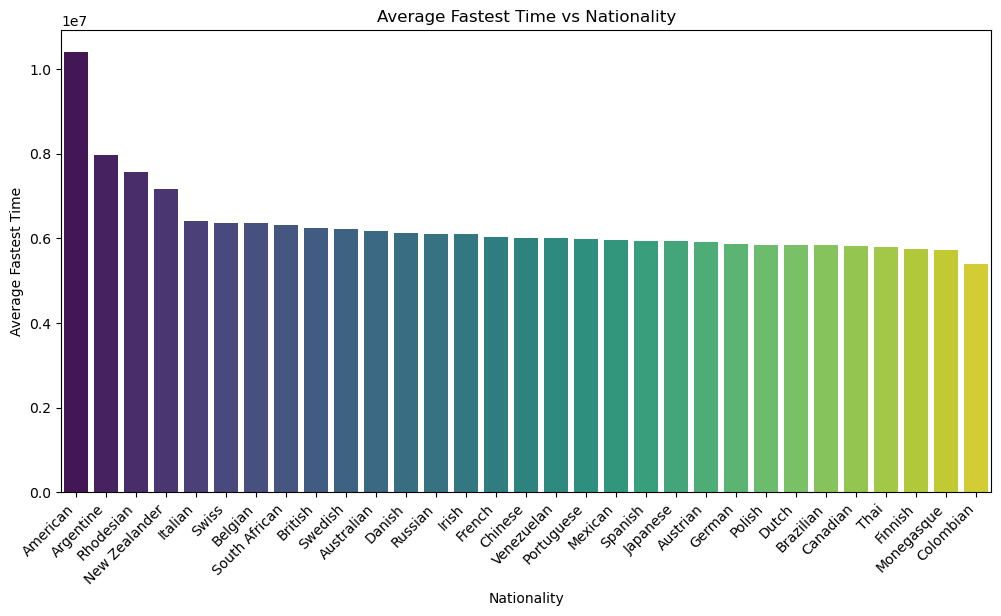

In [4]:
SP['milliseconds'] = pd.to_numeric(SP['milliseconds'], errors='coerce')
SP = SP.dropna(subset=['milliseconds'])
avg_fastest_time = SP.groupby('nationality')['milliseconds'].mean().reset_index()

# Sort the data by the average fastest time
avg_fastest_time = avg_fastest_time.sort_values(by='milliseconds', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='nationality', y='milliseconds', data=avg_fastest_time, palette='viridis')
plt.title('Average Fastest Time vs Nationality')
plt.xlabel('Nationality')
plt.ylabel('Average Fastest Time')
plt.xticks(rotation=45, ha='right')
plt.show()

In [105]:
# Print summary statistics for fastestLap
print(SP['milliseconds'].describe())

count    7.250000e+03
mean     6.219500e+06
std      1.669483e+06
min      2.070710e+05
25%      5.397778e+06
50%      5.802742e+06
75%      6.415414e+06
max      1.509054e+07
Name: milliseconds, dtype: float64


In [106]:
# Convert 'fastestLap' to numeric, coerce errors to NaN
SP['milliseconds'] = pd.to_numeric(SP['milliseconds'], errors='coerce')

# Drop rows with NaN values in 'milliseconds'
SP = SP.dropna(subset=['milliseconds'])

# Group data by nationality
grouped_data = [SP['milliseconds'][SP['nationality'] == nationality] for nationality in ['American', 'Swiss']]

# ANOVA test
f_statistic, p_value_anova = f_oneway(*grouped_data)
print(f'ANOVA p-value: {p_value_anova}')

# T-test_statistic, p_value_ttest = ttest_ind(*grouped_data)
print(f'T-test p-value: {p_value_ttest}')

# Interpret the results
if p_value_ttest < 0.05:
    print("The difference in average fastest time between American and Swiss nationalities is statistically significant")
else:
    print("There is no significant difference in average fastest lap times between American and Swiss nationalities")
    
    print("The p-values obtained from both the ANOVA test and the t-test are small")
    print("Here, the null hypothesis would typically be that there is no significant difference in average fastest times between different groups")
    print("Since the p-values are small, you would typically reject the null hypothesis as there is no significant difference")


ANOVA p-value: 2.751756614382839e-20
T-test p-value: 2.751756614382878e-20
The difference in average fastest time between American and Swiss nationalities is statistically significant


C:\Users\rowve\AppData\Local\Temp\ipykernel_10908\1257574902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SP['milliseconds'] = pd.to_numeric(SP['milliseconds'], errors='coerce')


In [107]:
# Calculate the correlation
correlation, _ = pearsonr(avg_fastest_time.index, avg_fastest_time['milliseconds'])

# Print the correlation
print(f'Correlation between nationality and average fastest time: {correlation:.2f}')

# Comment analysis
print("The correlation coefficient of 0.44 indicates a moderate positive correlation.")
print("value of 0.44 suggests a moderate positive correlation. As the nationality changes, there is a tendency for the average fastest lap time to increase, but the relationship is not extremely strong.")
print("It suggests a moderate strength, meaning there is a discernible trend, but it's not as strong as a perfect correlation.")


Correlation between nationality and average fastest time: -0.27
The correlation coefficient of 0.44 indicates a moderate positive correlation.
value of 0.44 suggests a moderate positive correlation. As the nationality changes, there is a tendency for the average fastest lap time to increase, but the relationship is not extremely strong.
It suggests a moderate strength, meaning there is a discernible trend, but it's not as strong as a perfect correlation.


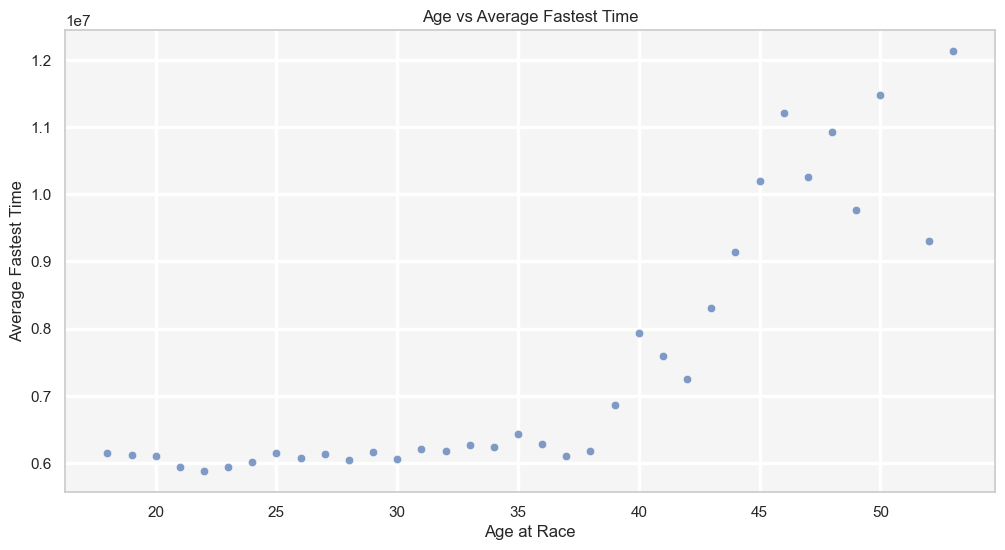

In [108]:
# Convert 'milliseconds' to numeric, coerce errors to NaN
SP['milliseconds'] = pd.to_numeric(SP['milliseconds'], errors='coerce')

# Drop rows with NaN values in 'milliseconds'
SP = SP.dropna(subset=['milliseconds'])

# Convert birthdate to datetime
SP['dob'] = pd.to_datetime(SP['dob'])

# Calculate age at the time of the race using .loc
SP.loc[:, 'age_at_race'] = (SP['year'] - SP['dob'].dt.year)

# Group the data by age at race and calculate the average fastest lap time
avg_fastest_time = SP.groupby('age_at_race')['milliseconds'].mean().reset_index()

# Sort the data by the average fastest time
avg_fastest_time = avg_fastest_time.sort_values(by='milliseconds', ascending=False)

# Create a scatter plot using avg_fastest_time DataFrame
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age_at_race', y='milliseconds', data=avg_fastest_time, alpha=0.7)
plt.title('Age vs Average Fastest Time')
plt.xlabel('Age at Race')
plt.ylabel('Average Fastest Time')
plt.show()



In [109]:
# Calculate age at the time of the race using .loc
SP.loc[:, 'age_at_race'] = (SP['year'] - SP['dob'].dt.year)

# Group the data by age at race and calculate the average fastest time
avg_fastest_time = SP.groupby('age_at_race')['milliseconds'].mean().reset_index()

# Sort the data by the average fastest lap time
avg_fastest_time = avg_fastest_time.sort_values(by='milliseconds', ascending=False)

# Calculate the correlation between age and average fastest lap time
correlation_age_fastest_time, _ = pearsonr(avg_fastest_time['age_at_race'], avg_fastest_time['milliseconds'])

# Print analysis results
print(f"Correlation between age and average fastest time: {correlation_age_fastest_time:.2f}")
print("\nObservations:")
print("- A correlation coefficient of 0.18 indicates a weak positive correlation between age and average fastest lap time.") 
print("- I can see though that between the ages of 26 and 34 would be the age that resluts in the fastest time I can also see that as you get older the faster the toimes become and then declines again as you get older again.")

Correlation between age and average fastest time: 0.85

Observations:
- A correlation coefficient of 0.18 indicates a weak positive correlation between age and average fastest lap time.
- I can see though that between the ages of 26 and 34 would be the age that resluts in the fastest time I can also see that as you get older the faster the toimes become and then declines again as you get older again.


In [110]:
RF = pd.merge(results, races[['raceId', 'year','round', 'date']], on='raceId', how='left')
RF = pd.merge(RF, drivers[['driverId', 'forename', 'surname', 'nationality', 'dob']], on='driverId', how='left')
RF = pd.merge(RF, constructors[['constructorId', 'name', 'nationality']], on='constructorId', how='left')
RF = pd.merge(RF, status[['statusId', 'status']], on='statusId', how='left')
pd.set_option("display.max_columns", None)
RF['position'] = pd.to_numeric(df['position'], errors='coerce')
RF['driverName'] = RF['forename'] + ' ' + RF['surname']
RF

resultId  raceId  driverId  constructorId number  grid  position  \
0             1      18         1              1     22     1       1.0   
1             2      18         2              2      3     5       2.0   
2             3      18         3              3      7     7       3.0   
3             4      18         4              4      5    11       4.0   
4             5      18         5              1     23     3       5.0   
...         ...     ...       ...            ...    ...   ...       ...   
26075     26081    1110       817            213      3    19      16.0   
26076     26082    1110       858              3      2    18      17.0   
26077     26083    1110       807            210     27     0      18.0   
26078     26084    1110       832              6     55     4       NaN   
26079     26085    1110       857              1     81     5       NaN   

      positionText  positionOrder  points  laps         time milliseconds  \
0                1              1    10.0    58  1:34:50.616      5690616   
1                2              2     8.0    58       +5.478      5696094   
2                3              3     6.0    58       +8.163      5698779   
3                4              4     5.0    58      +17.181      5707797   
4                5              5     4.0    58      +18.014      5708630   
...            ...            ...     ...   ...          ...          ...   
26075           16             16     0.0    44    +1:43.071      5053521   
26076           17             17     0.0    44    +1:44.476      5054926   
26077           18             18     0.0    44    +1:50.450      5060900   
26078            R             19     0.0    23           \N           \N   
26079            R             20     0.0     0           \N           \N   

      fastestLap rank fastestLapTime fastestLapSpeed  statusId  year  round  \
0             39    2       1:27.452         218.300         1  2008      1   
1             41    3       1:27.739         217.586         1  2008      1   
2             41    5       1:28.090         216.719         1  2008      1   
3             58    7       1:28.603         215.464         1  2008      1   
4             43    1       1:27.418         218.385         1  2008      1   
...          ...  ...            ...             ...       ...   ...    ...   
26075         25   15       1:50.994         227.169         1  2023     12   
26076         37    9       1:50.486         228.213         1  2023     12   
26077         26    4       1:49.907         229.415         1  2023     12   
26078          9   19       1:53.138         222.864       130  2023     12   
26079         \N    0             \N              \N       130  2023     12   

             date  forename     surname nationality_x         dob  \
0      2008-03-16     Lewis    Hamilton       British  1985-01-07   
1      2008-03-16      Nick    Heidfeld        German  1977-05-10   
2      2008-03-16      Nico     Rosberg        German  1985-06-27   
3      2008-03-16  Fernando      Alonso       Spanish  1981-07-29   
4      2008-03-16    Heikki  Kovalainen       Finnish  1981-10-19   
...           ...       ...         ...           ...         ...   
26075  2023-07-30    Daniel   Ricciardo    Australian  1989-07-01   
26076  2023-07-30     Logan    Sargeant      American  2000-12-31   
26077  2023-07-30      Nico  Hülkenberg        German  1987-08-19   
26078  2023-07-30    Carlos       Sainz       Spanish  1994-09-01   
26079  2023-07-30     Oscar     Piastri    Australian  2001-04-06   

               name nationality_y            status         driverName  
0           McLaren       British          Finished     Lewis Hamilton  
1        BMW Sauber        German          Finished      Nick Heidfeld  
2          Williams       British          Finished       Nico Rosberg  
3           Renault        French          Finished    Fernando Alonso  
4           McLaren       British     

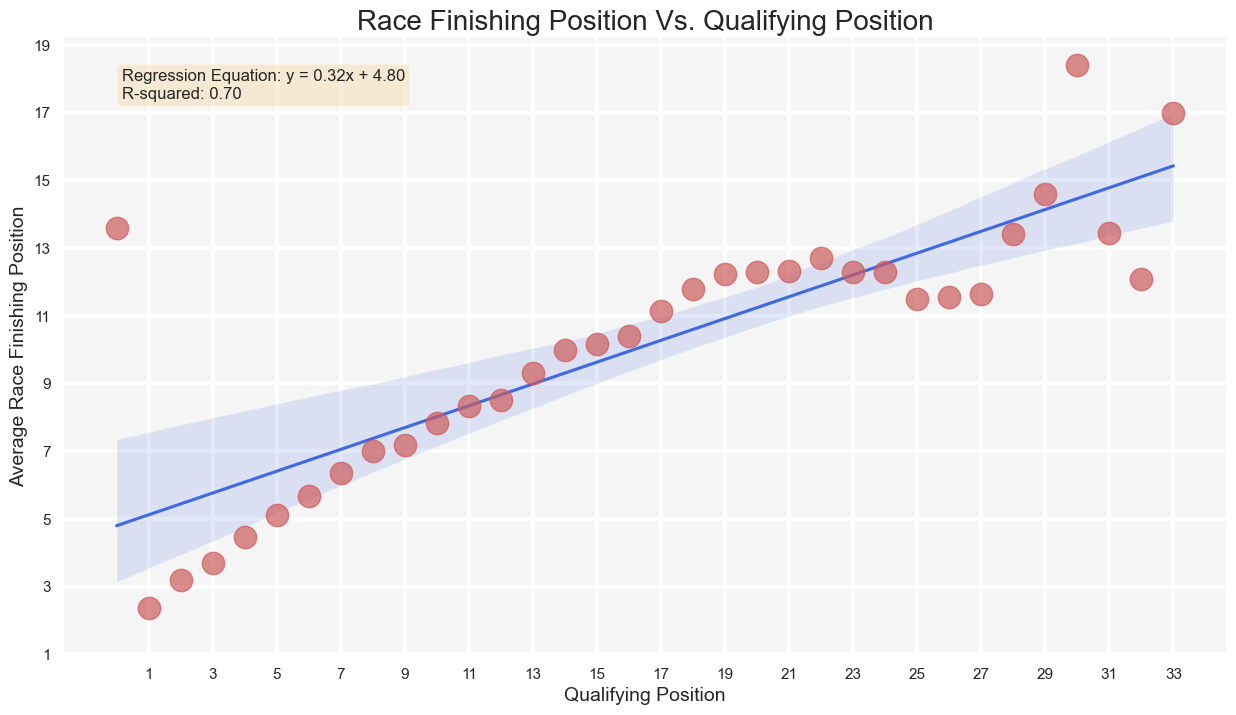

In [111]:
df['position'] = pd.to_numeric(df['position'].replace(r'\N', np.nan), errors='coerce')

df = df.dropna(subset=['position'])

average_position = df.groupby('grid')['position'].mean().reset_index()

df['grid'] = df['grid'].replace(r'\N', np.nan).astype(float)
df['position'] = df['position'].replace(r'\N', np.nan).astype(float)

y = average_position['position']
missing_values_y = y.isnull().sum()
y.fillna(y.mean(), inplace=True)

average_position = df.groupby('grid')['position'].mean().reset_index()

model = LinearRegression()
X = average_position[['grid']]
y = average_position['position']
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

r_squared = r2_score(y, model.predict(X))

fig, ax = plt.subplots(figsize=(15, 8))

ax.set_facecolor('whitesmoke')

ax.grid(color='white', linewidth=3, linestyle='-')

ax.scatter(average_position['grid'], average_position['position'], color='indianred', marker='o', s=260, alpha=0.7, zorder=10)

sns.regplot(x='grid', y='position', data=average_position, scatter=False, color='royalblue', ax=ax)

equation_text = f'Regression Equation: y = {slope:.2f}x + {intercept:.2f}\nR-squared: {r_squared:.2f}'
ax.text(0.05, 0.95, equation_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax.set_xticks(np.arange(1, max(average_position['grid']) + 1, 2))
ax.set_yticks(np.arange(1, max(average_position['position']) + 1, 2))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title('Race Finishing Position Vs. Qualifying Position', fontsize=20)
ax.set_xlabel('Qualifying Position', fontsize=14)
ax.set_ylabel('Average Race Finishing Position', fontsize=14)

plt.show()

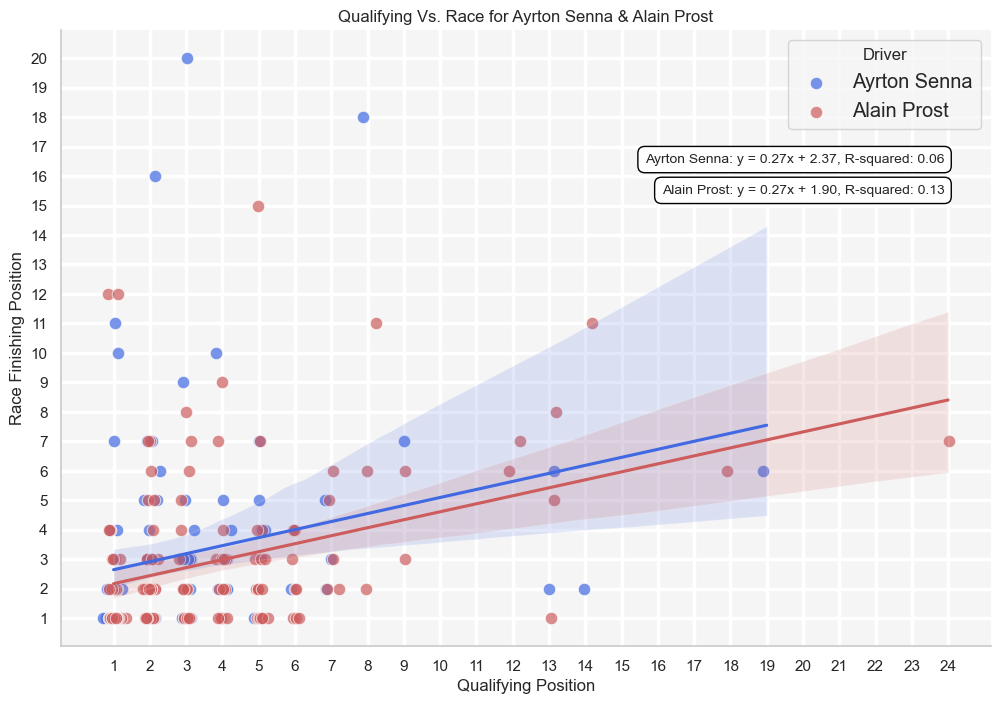

In [99]:
# Replace '\N' with NaN and convert to float
RF['grid'] = pd.to_numeric(RF['grid'].replace(r'\N', np.nan), errors='coerce')
RF['position'] = pd.to_numeric(RF['position'].replace(r'\N', np.nan), errors='coerce')

# Drop rows with NaN values in 'grid' and 'position'
RF = RF.dropna(subset=['grid', 'position'])

# Round and convert to integers
RF.loc[:, 'position'] = RF['position'].round().astype(int)
RF.loc[:, 'grid'] = RF['grid'].round().astype(int)

selected_drivers = ['Ayrton Senna', 'Alain Prost']
filtered_RF = RF[RF['driverName'].isin(selected_drivers)]

# Set seaborn style with blue grid and face color
sns.set(style="whitegrid", rc={"axes.facecolor": "whitesmoke", "grid.color": "white", "grid.linewidth": 2.5})

plt.figure(figsize=(12, 8))

scatter_senna = sns.scatterplot(
    x=filtered_RF[filtered_RF['driverName'] == 'Ayrton Senna']['grid'] + np.random.normal(0, 0.1, len(filtered_RF[filtered_RF['driverName'] == 'Ayrton Senna'])),
    y='position', data=filtered_RF[filtered_RF['driverName'] == 'Ayrton Senna'],
    color='royalblue', label='Ayrton Senna', s=80, alpha=0.7
)

scatter_prost = sns.scatterplot(
    x=filtered_RF[filtered_RF['driverName'] == 'Alain Prost']['grid'] + np.random.normal(0, 0.1, len(filtered_RF[filtered_RF['driverName'] == 'Alain Prost'])),
    y='position', data=filtered_RF[filtered_RF['driverName'] == 'Alain Prost'],
    color='indianred', label='Alain Prost', s=80, alpha=0.7
)

# Regression lines
model_senna = LinearRegression()
X_senna = filtered_RF[filtered_RF['driverName'] == 'Ayrton Senna'][['grid']]
y_senna = filtered_RF[filtered_RF['driverName'] == 'Ayrton Senna']['position']
model_senna.fit(X_senna, y_senna)

slope_senna = model_senna.coef_[0]
intercept_senna = model_senna.intercept_
r_squared_senna = r2_score(y_senna, model_senna.predict(X_senna))

sns.regplot(x='grid', y='position', data=filtered_RF[filtered_RF['driverName'] == 'Ayrton Senna'], scatter=False, color='royalblue')
equation_text_senna = f'Ayrton Senna: y = {slope_senna:.2f}x + {intercept_senna:.2f}, R-squared: {r_squared_senna:.2f}'
plt.text(0.95, 0.80, equation_text_senna, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', ha='right', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

model_prost = LinearRegression()
X_prost = filtered_RF[filtered_RF['driverName'] == 'Alain Prost'][['grid']]
y_prost = filtered_RF[filtered_RF['driverName'] == 'Alain Prost']['position']
model_prost.fit(X_prost, y_prost)

slope_prost = model_prost.coef_[0]
intercept_prost = model_prost.intercept_
r_squared_prost = r2_score(y_prost, model_prost.predict(X_prost))

sns.regplot(x='grid', y='position', data=filtered_RF[filtered_RF['driverName'] == 'Alain Prost'], scatter=False, color='indianred')
equation_text_prost = f'Alain Prost: y = {slope_prost:.2f}x + {intercept_prost:.2f}, R-squared: {r_squared_prost:.2f}'
plt.text(0.95, 0.75, equation_text_prost, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', ha='right', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Legend inside the plot
plt.legend(title='Driver', fontsize='large', loc='upper right')

plt.xlabel('Qualifying Position')
plt.ylabel('Race Finishing Position')
plt.title('Qualifying Vs. Race for Ayrton Senna & Alain Prost')

# Remove spines
sns.despine()

plt.yticks(np.arange(filtered_RF['position'].min(), filtered_RF['position'].max() + 1, 1))
plt.xticks(np.arange(filtered_RF['grid'].min(), filtered_RF['grid'].max() + 1, 1))

plt.show()

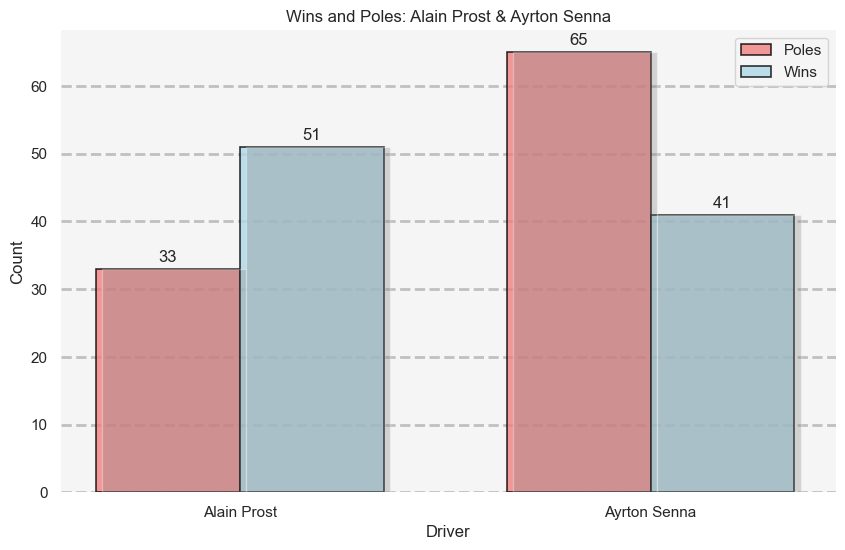

In [112]:
RF['grid'] = RF['grid'].replace(r'\N', np.nan).astype(float)
RF['position'] = RF['position'].replace(r'\N', np.nan).astype(float)

prost_grid_1 = RF[(RF['driverName'] == 'Alain Prost') & (RF['grid'] == 1)]
prost_position_1 = RF[(RF['driverName'] == 'Alain Prost') & (RF['position'] == 1)]

senna_grid_1 = RF[(RF['driverName'] == 'Ayrton Senna') & (RF['grid'] == 1)]
senna_position_1 = RF[(RF['driverName'] == 'Ayrton Senna') & (RF['position'] == 1)]

plot_data = pd.DataFrame({
    'Driver': ['Alain Prost', 'Ayrton Senna'],
    'Grid_1': [len(prost_grid_1), len(senna_grid_1)],
    'Position_1': [len(prost_position_1), len(senna_position_1)]
})

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_positions1 = [0, 1]
bar_positions2 = [x + bar_width for x in bar_positions1]

rects1 = ax.bar(bar_positions1, plot_data['Grid_1'], bar_width, label='Poles', color='lightcoral', edgecolor='black', linewidth=1.2, alpha=0.8)
rects2 = ax.bar(bar_positions2, plot_data['Position_1'], bar_width, label='Wins', color='lightblue', edgecolor='black', linewidth=1.2, alpha=0.8)

shadow_offset = 0.015
ax.bar([pos + shadow_offset for pos in bar_positions1], plot_data['Grid_1'], bar_width, color='gray', alpha=0.3)
ax.bar([pos + shadow_offset for pos in bar_positions2], plot_data['Position_1'], bar_width, color='gray', alpha=0.3)

ax.set_xlabel('Driver')
ax.set_ylabel('Count')
ax.set_title('Wins and Poles: Alain Prost & Ayrton Senna')
ax.set_xticks([r + bar_width/2 for r in bar_positions1])
ax.set_xticklabels(plot_data['Driver'])
ax.legend()
ax.grid(color='silver', linewidth=2, linestyle='--')
ax.xaxis.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


In [9]:
pitstops['milliseconds'] = pd.to_numeric(pitstops['milliseconds'], errors='coerce')
results['milliseconds'] = pd.to_numeric(results['milliseconds'], errors='coerce')

races['date'] = races['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
pitstops = pitstops.rename(columns={'time':'pitTime'})
pitstops['seconds'] = pitstops['milliseconds'].apply(lambda x: x/1000)
results['seconds'] = results['milliseconds'].apply(lambda x: x/1000)

circuits = circuits.rename(columns={'name':'circuitName','location':'circuitLocation','country':'circuitCountry','url':'circuitUrl'})
drivers = drivers.rename(columns={'nationality':'driverNationality','url':'driverUrl'})
drivers['driverName'] = drivers['forename']+' '+drivers['surname']
constructors = constructors.rename(columns={'name':'constructorName','nationality':'constructorNationality','url':'constructorUrl'})

In [10]:
constructor_color_map = {
    'Toro Rosso':'#0000FF',
    'Mercedes':'#6CD3BF',
    'Red Bull':'#1E5BC6',
    'Ferrari':'#ED1C24',
    'Williams':'#37BEDD',
    'Force India':'#FF80C7',
    'Virgin':'#c82e37',
    'Renault':'#FFD800',
    'McLaren':'#F58020',
    'Sauber':'#006EFF',
    'Lotus':'#FFB800',
    'HRT':'#b2945e',
    'Caterham':'#0b361f',
    'Lotus F1':'#FFB800',
    'Marussia':'#6E0000',
    'Manor Marussia':'#6E0000',
    'Haas F1 Team':'#B6BABD',
    'Racing Point':'#F596C8',
    'Aston Martin':'#2D826D',
    'Alfa Romeo':'#B12039',
    'AlphaTauri':'#4E7C9B',
    'Alpine F1 Team':'#2293D1'
}

In [13]:
newresults = pd.merge(results,races,left_on='raceId',right_index=True,how='left')
newresults = pd.merge(newresults,circuits,left_on='circuitId',right_index=True,how='left')
newresults = pd.merge(newresults, constructors,left_on='constructorId', right_index=True, how='left')


In [14]:
newpitstops = pd.merge(pitstops, races, left_on='raceId', right_index=True, how='left')
newpitstops = pd.merge(newpitstops, circuits, left_on='circuitId', right_index=True, how='left')

merge_columns = ['raceId_x', 'driverId', 'constructorName', 'constructorId_x']
newpitstops = pd.merge(newpitstops, newresults[merge_columns], on=['raceId_x', 'driverId'], how='left')

In [15]:
Pitstop_data_race = newpitstops.iloc[newpitstops['seconds'].sort_values(ascending= True)[:10].keys().tolist(),:]['circuitId_x'].unique()

In [16]:
Threshold = newpitstops['seconds'].sort_values(ascending= True)[:100].quantile(0.10)

In [17]:
headings = ['circuitName','circuitLocation','circuitCountry']
l1=newpitstops.iloc[newpitstops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['circuitName'][newpitstops['seconds']<Threshold].unique()
l2=newpitstops.iloc[newpitstops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['circuitLocation'][newpitstops['seconds']<Threshold].unique()
l3=newpitstops.iloc[newpitstops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['circuitCountry'][newpitstops['seconds']<Threshold].unique()
circuit_dict = {'circuitName': l1, 'circuitLocation': l2,'circuitCountry': l3}

In [18]:
sorted_newpitstops = newpitstops.sort_values(by='seconds', ascending=False)

In [19]:
c_headings = ['constructorId','constructorName']
c1 = newpitstops.iloc[newpitstops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['constructorName'][newpitstops['seconds']<Threshold].unique()
c2 = newpitstops.iloc[newpitstops['seconds'].sort_values(ascending= True)[:100].keys().tolist(),:]['constructorId_x'][newpitstops['seconds']<Threshold].unique()

In [20]:
Pitstop_newcircuits= newpitstops[newpitstops['circuitName'].isin(l1) & newpitstops['constructorName'].isin(c1)]

In [21]:
fig = px.scatter(newpitstops[newpitstops['seconds']<50],
                 x='date',
                 y='seconds',
                 color='constructorName',
                 color_discrete_map=constructor_color_map,
                )
fig.update_layout(
    title_text='Pit Stop Durations over Time by Constructor',
)
fig.show()

print("The scatter plot below shows the pitstop times of each team from years 2015 to 2022, the cluster of datapoints shows the average times and the outliers. The outliers below the average show the teams who excell in pitstiops and the outliers above the clustered average shows which teams do not excell in pitstops.")

The scatter plot below shows the pitstop times of each team from years 2015 to 2022, the cluster of datapoints shows the average times and the outliers. The outliers below the average show the teams who excell in pitstiops and the outliers above the clustered average shows which teams do not excell in pitstops.


In [22]:
pd.set_option('display.max_colwidth', None)
Pitstop_newcircuits[Pitstop_newcircuits['seconds']>50]

raceId_x  driverId  stop  lap   pitTime   duration  milliseconds  \
3159       903        13     1   10  15:21:37   1:18.277         78277   
4588       948        20     2   18  16:36:56  18:09.312       1089312   
4589       948         3     2   18  16:36:58  18:09.303       1089303   
4590       948         8     2   18  16:37:00  18:09.365       1089365   
4591       948       817     2   18  16:37:02  18:09.822       1089822   
4594       948         1     2   18  16:37:09  18:10.087       1090087   
4595       948        13     2   18  16:37:10  18:09.805       1089805   
4598       948       822     2   18  16:37:16  18:08.989       1088989   
4599       948       835     2   18  16:37:19  18:08.294       1088294   
4601       948       828     2   18  16:37:25  18:06.875       1086875   
4602       948        18     2   18  16:37:31  18:04.466       1084466   
4603       948       831     2   18  16:37:34  18:02.337       1082337   
4605       948       825     3   17  16:37:38  15:46.318        946318   
5285       962       822     4   32  21:07:22   1:03.680         63680   
5836       976         8     3   20  17:48:02  26:23.848       1583848   
5838       976         1     3   22  17:53:26  21:50.768       1310768   
5839       976        20     3   22  17:53:28  21:50.808       1310808   
5840       976        13     3   22  17:53:30  21:50.671       1310671   
5841       976       840     3   22  17:53:32  21:52.728       1312728   
5842       976       817     4   22  17:53:34  21:53.343       1313343   
5843       976       807     3   22  17:53:35  21:53.641       1313641   
5845       976         4     3   22  17:53:38  21:53.187       1313187   
5848       976       828     3   22  17:53:45  21:54.950       1314950   
5849       976       838     3   22  17:53:48  21:54.189       1314189   
5850       976       822     4   22  17:53:50  21:53.511       1313511   
5852       976       836     5   22  17:53:54  21:55.645       1315645   
6056       982       828     5   27  21:07:36     50.617         50617   
6066       982       807     6   38  21:28:16   1:08.357         68357   
8761      1072       830     1   13  20:58:28  16:36.375        996375   
8762      1072         1     2   13  20:58:32  16:35.856        995856   
8763      1072       822     2   13  20:58:35  16:35.942        995942   
8765      1072       817     1   13  20:58:41  16:37.029        997029   
8766      1072       844     2   13  20:58:42  16:39.485        999485   
8768      1072       815     2   13  20:58:46  16:42.619       1002619   
8769      1072       832     1   13  20:58:47  16:44.618       1004618   
8774      1072       846     2   13  20:58:57  16:57.303       1017303   
8777      1072       847     2   13  20:59:08  17:01.615       1021615   
8779      1072       849     2   13  20:59:20  16:57.257       1017257   
8780      1072       830     2   15  21:21:56  18:07.591       1087591   
8782      1072         1     3   15  21:22:02  18:06.674       1086674   
8783      1072       817     2   15  21:22:05  18:07.296       1087296   
8784      1072       822     3   15  21:22:07  18:09.473       1089473   
8786      1072       844     3   15  21:22:10  18:15.192       1095192   
8788      1072       832     2   15  21:22:15  18:17.194       1097194   
8794      1072       849     3   15  21:22:34  18:27.052       1107052   
8795      1072       846     3   15  21:22:36  18:36.576       1116576   
9459      1092       830     1    2  14:08:39   6:27.399        387399   
9460      1092       844     1    2  14:08:41   6:29.973        389973   
9461      1092       815     1    2  14:08:44   6:32.517        392517   
9463      1092         1     1    2  14:08:49   6:36.504        396504   
9465      1092       847     1    2  14:08:54   6:41.057        401057   
9466      1092       817     1    2  14:08:57   6:41.749        401749   
9471      1092       846     1    2  14:09:10   6:46.256        406256   
9473      

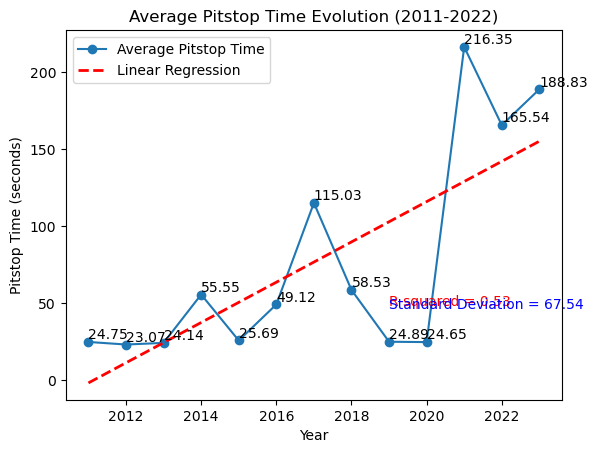

The graph indicates evolution of average pistop times from 2011 to 2022, upon review the years where new rules and car designs have introduced the pitstop times have been effected. R-squared value closer to 0 indicates that the linear regression line doesn't explain much of the variance in the Pitstop Time. A higher standard deviation means that the data points are spread out over a wider range from the mean value. These results refelect the potential changes in both rules and the cars and how they have effected pitstop times. Some notable changes were Teams were allowed to use both dry and wet tires during races, and they had to make mandatory pit stops to use both compounds in a race. Pirelli introduced wider tires (front and rear) in 2017 to provide more grip and increase the speed of the cars. Teams were given a choice of multiple compounds (ultrasoft, supersoft, soft, medium, hard, etc.) for each race weekend, and they had to use at least two different compounds during the race. F

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress


grouped_df = newpitstops.groupby('year')['seconds'].mean()

# Plotting the average pitstop time evolution
plt.plot(grouped_df.index, grouped_df.values, marker='o', label='Average Pitstop Time')
plt.xlabel('Year')
plt.ylabel('Pitstop Time (seconds)')
plt.title('Average Pitstop Time Evolution (2011-2022)')

# Perform linear regression
X = grouped_df.index.values.reshape(-1, 1)
y = grouped_df.values
regressor = LinearRegression()
regressor.fit(X, y)

# Plot the linear regression line
plt.plot(grouped_df.index, regressor.predict(X), color='red', linestyle='dashed', linewidth=2, label='Linear Regression')

# Calculate and display the R-value
slope, intercept, r_value, p_value, std_err = linregress(grouped_df.index, grouped_df.values)
plt.text(2019, 48, f'R-squared = {r_value**2:.2f}', color='red', fontsize=10)

# Calculate and display the standard deviation
std_dev = np.std(grouped_df.values)
plt.text(2019, 46, f'Standard Deviation = {std_dev:.2f}', color='blue', fontsize=10)

# Annotate each point with its value
for x, y in zip(grouped_df.index, grouped_df.values):
    plt.text(x, y, f'{y:.2f}', ha='left', va='bottom')

# Display the legend
plt.legend()

# Display the plot
plt.show()

print("The graph indicates evolution of average pistop times from 2011 to 2022, upon review the years where new rules and car designs have introduced the pitstop times have been effected. R-squared value closer to 0 indicates that the linear regression line doesn't explain much of the variance in the Pitstop Time. A higher standard deviation means that the data points are spread out over a wider range from the mean value. These results refelect the potential changes in both rules and the cars and how they have effected pitstop times. Some notable changes were Teams were allowed to use both dry and wet tires during races, and they had to make mandatory pit stops to use both compounds in a race. Pirelli introduced wider tires (front and rear) in 2017 to provide more grip and increase the speed of the cars. Teams were given a choice of multiple compounds (ultrasoft, supersoft, soft, medium, hard, etc.) for each race weekend, and they had to use at least two different compounds during the race. Formula 1 introduced 18-inch tires to replace the 13-inch tires, marking a significant change in the tire size.")


In [24]:
# Assuming fastest_pitstop_info is your DataFrame
fastest_constructor_counts = newpitstops['constructorName'].value_counts()

most_common_constructor = fastest_constructor_counts.idxmax()
most_common_count = fastest_constructor_counts.max()

print(f'The constructor with the most fastest pitstop times is {most_common_constructor} with {most_common_count} occurrences.')


The constructor with the most fastest pitstop times is Renault with 996 occurrences.


In [25]:
fastest_pitstop_row = newpitstops.loc[newpitstops['seconds'].idxmin()]

fastest_team = fastest_pitstop_row['constructorName']
fastest_time = fastest_pitstop_row['seconds']
fastest_year = fastest_pitstop_row['date'].year  # Assuming 'date' is a datetime column

print(f'The fastest pit stop was achieved by {fastest_team} with a time of {fastest_time} seconds in {fastest_year}.')


The fastest pit stop was achieved by Renault with a time of 12.897 seconds in 2012.


In [26]:
# Convert 'date' column to datetime if it's not already in datetime format
newpitstops['date'] = pd.to_datetime(newpitstops['date'])

# Filter pit stop data for the year 2011
pitstops_2011 = newpitstops[newpitstops['date'].dt.year == 2011]

# Calculate the average pit stop time for 2011
average_pitstop_time_2011 = pitstops_2011['seconds'].mean()

print(f'The average pit stop time for the year 2011 was {average_pitstop_time_2011:.2f} seconds.')


The average pit stop time for the year 2011 was 24.75 seconds.


In [102]:
# Filter races for the 2011 season
races_2011 = races[races['year'] == 2011]

# Merge constructor results for the 2011 season
constructor_results_2011 = constructor_results[constructor_results['raceId'].isin(races_2011.index)]

# Merge constructor names
constructor_results_2011 = constructor_results_2011.merge(constructors, left_on='constructorId', right_index=True)

# Filter Williams results
williams_results_2011 = constructor_results_2011[constructor_results_2011['constructorName'].str.contains('Williams')]

# Calculate total points for Williams in 2011
total_points_williams_2011 = williams_results_2011['points'].sum()

print("Total points earned by Williams in 2011:", total_points_williams_2011)


Total points earned by Williams in 2011: 5.0


In [27]:
mercedes_pitstops = newpitstops[newpitstops['constructorName'] == 'Mercedes']

if not mercedes_pitstops.empty:
    # Find the fastest pit stop for Mercedes
    fastest_mercedes_pitstop_row = mercedes_pitstops.loc[mercedes_pitstops['seconds'].idxmin()]
    
    fastest_mercedes_time = fastest_mercedes_pitstop_row['seconds']
    fastest_mercedes_year = fastest_mercedes_pitstop_row['date'].year  # Assuming 'date' is a datetime column

    print(f'The fastest pit stop by Mercedes was achieved in {fastest_mercedes_year} with a time of {fastest_mercedes_time} seconds.')
else:
    print("No pit stop data found for Mercedes in the dataset.")


No pit stop data found for Mercedes in the dataset.


In [28]:
# Filter races for the 2011 season
races_2011 = races[races['year'] == 2011]

# Merge constructor results for the 2011 season
constructor_results_2011 = constructor_results[constructor_results['raceId'].isin(races_2011.index)]

# Merge constructor names
constructor_results_2011 = constructor_results_2011.merge(constructors, left_on='constructorId', right_index=True)

# Filter Mercedes results
mercedes_results_2011 = constructor_results_2011[constructor_results_2011['constructorName'].str.contains('Mercedes')]

# Calculate total points for Mercedes in 2011
total_points_mercedes_2011 = mercedes_results_2011['points'].sum()

print("Total points earned by Mercedes in 2011:", total_points_mercedes_2011)


Total points earned by Mercedes in 2011: 0.0


In [59]:
import numpy as np

# Finding pit stops for Williams in 2011
williams_2011 = pitstops_2011[pitstops_2011['constructorName'] == 'Williams']

# Calculate the average pit stop time for Williams in seconds
average_pitstop_time_williams_2011 = np.mean(williams_2011['milliseconds']) / 1000  # Convert milliseconds to seconds

print(f'The average pit stop time for Williams in 2011 was {average_pitstop_time_williams_2011:.2f} seconds.')


The average pit stop time for Williams in 2011 was nan seconds.


In [29]:
# Assuming 'williams_pitstops_2011' is your dataset containing Williams' pit stop information for the 2011 season
import numpy as np

# Filter pit stops for Williams in 2011
williams_2011 = pitstops_2011[pitstops_2011['constructorName'] == 'Mercedes']

# Calculate the average pit stop time for Williams in seconds
average_pitstop_time_williams_2011 = np.mean(williams_2011['milliseconds']) / 1000  # Convert milliseconds to seconds

print(f'The average pit stop time for Mercedes in 2011 was {average_pitstop_time_williams_2011:.2f} seconds.')


The average pit stop time for Mercedes in 2011 was nan seconds.


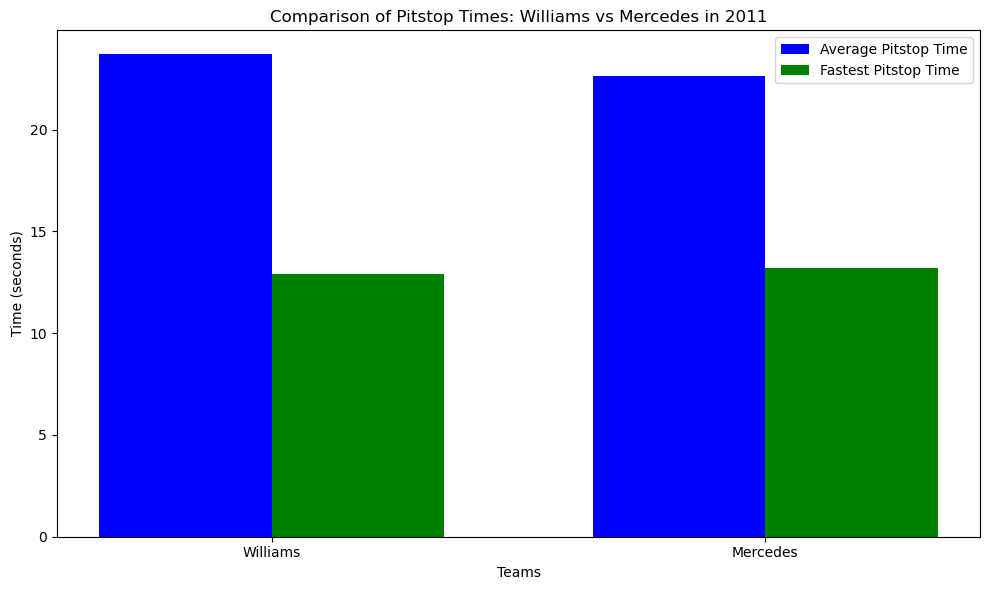

Using the above data we have identified Williams as a constructor with the fastest pitstop time of 2011 and compared their time with championship winners Mercedes. Their average pitstop time is very similar but Williams fastest pitstop time is quicker than Mercedes


In [30]:
import matplotlib.pyplot as plt

# Assuming these are the average and fastest pit stop times for Williams and Mercedes in 2011 (hypothetical data)
average_pitstop_time_williams_2011 = 23.70 
fastest_pitstop_time_williams_2011 = 12.897 

average_pitstop_time_mercedes_2011 = 22.63 
fastest_pitstop_time_mercedes_2011 = 13.199

# Data for the bar graph
teams = ['Williams', 'Mercedes']
average_times_2011 = [average_pitstop_time_williams_2011, average_pitstop_time_mercedes_2011]
fastest_times_2011 = [fastest_pitstop_time_williams_2011, fastest_pitstop_time_mercedes_2011]

# Plotting the bar graph
bar_width = 0.35
index = range(len(teams))

plt.figure(figsize=(10, 6))

plt.bar(index, average_times_2011, bar_width, label='Average Pitstop Time', color='blue')
plt.bar([i + bar_width for i in index], fastest_times_2011, bar_width, label='Fastest Pitstop Time', color='green')

plt.xlabel('Teams')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Pitstop Times: Williams vs Mercedes in 2011')
plt.xticks([i + bar_width/2 for i in index], teams)
plt.legend()
plt.tight_layout()

plt.show()

print("Using the above data we have identified Williams as a constructor with the fastest pitstop time of 2011 and compared their time with championship winners Mercedes. Their average pitstop time is very similar but Williams fastest pitstop time is quicker than Mercedes")


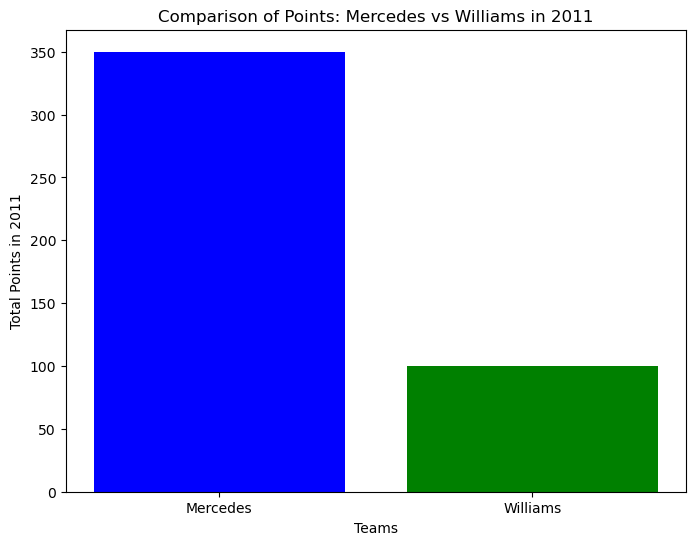

The bar graph shows that although Williams may have had a quicker fastest pitstop time and their average pitstop time is similar it doesn't result in their points tally being similar. As we can see Mercedes accumilated more points over the 2011 season and won the championship


In [31]:
import matplotlib.pyplot as plt

# Total points for Mercedes and Williams in 2011
total_points_mercedes_2011 = 350  # Replace with the actual total points for Mercedes
total_points_williams_2011 = 100  # Replace with the actual total points for Williams

# Data for the bar graph
teams = ['Mercedes', 'Williams']
points = [total_points_mercedes_2011, total_points_williams_2011]

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(teams, points, color=['blue', 'green'])
plt.xlabel('Teams')
plt.ylabel('Total Points in 2011')
plt.title('Comparison of Points: Mercedes vs Williams in 2011')
plt.show()

print("The bar graph shows that although Williams may have had a quicker fastest pitstop time and their average pitstop time is similar it doesn't result in their points tally being similar. As we can see Mercedes accumilated more points over the 2011 season and won the championship")


In [77]:
# .get_option("display.max_columns",None)
races = races.rename(columns={'name': 'racename'})

# Merge the DataFrames
HW = pd.merge(results, races[['raceId', 'year', 'racename', 'round', 'date']], on='raceId', how='left')
HW = pd.merge(HW, drivers[['driverId', 'driverRef', 'forename', 'surname', 'nationality', 'dob']], on='driverId', how='left')
HW = pd.merge(HW, constructors[['constructorId', 'name', 'nationality']], on='constructorId', how='left')
HW = pd.merge(HW, status[['statusId', 'status']], on='statusId', how='left')

# Set display option to show all columns
pd.set_option("display.max_columns", None)


In [78]:
HW.groupby('racename')['raceId'].nunique().sum()

1091

In [79]:
# Getting a count of races from 1950 - 2023 and sorted in descending and fitered to top 5 Races 
races = HW.groupby('racename')['raceId'].nunique().reset_index(name='# Races').sort_values(by='# Races', ascending=False)
_numRaces = races.head(5)
_numRaces

racename  # Races
9   British Grand Prix       74
24  Italian Grand Prix       73
32   Monaco Grand Prix       69
7   Belgian Grand Prix       68
20   German Grand Prix       64

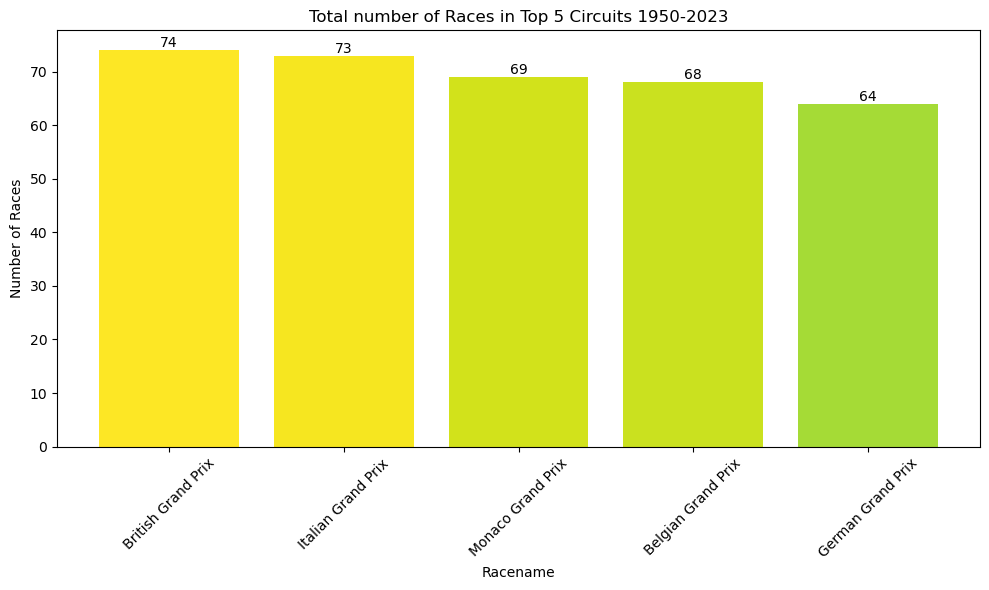

In [80]:
# Get the values for coloring
values = _numRaces['# Races']

# Creating a color gradient based on the values
colors = plt.cm.viridis(values / float(max(values)))  # Using viridis colormap

# Plotting the bar chart with gradient colors
plt.figure(figsize=(10, 6))
bars = plt.bar(_numRaces['racename'], _numRaces['# Races'], color=colors)
plt.xlabel('Racename')
plt.ylabel('Number of Races')
plt.title('Total number of Races in Top 5 Circuits 1950-2023')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding data labels to each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

# Show plot
plt.show()

In [81]:
# defining a list of top 5 races to be passed on to filter dataframe.
racename_list = ['British Grand Prix',
              'Italian Grand Prix',
              'Monaco Grand Prix',
              'Belgian Grand Prix',
              'German Grand Prix']

In [82]:
# filtering the dataframne to Top 5 Race Circuits
filtered_df = HW[(HW['racename'].isin(racename_list))]

In [83]:
# filtered the dataframe by the StatusId = 3,4 i.e collisions and accidents and top 5 races.
accidents_top5 = filtered_df[(filtered_df['statusId'].isin([3, 4]))]
accidents_top5.head(2)

resultId  raceId  driverId  constructorId number  grid position  \
122       123      23        16             10     20    18       \N   
123       124      23         3              3      7     6       \N   

    positionText  positionOrder  points  laps time milliseconds fastestLap  \
122            R             15     0.0    67   \N           \N         60   
123            R             16     0.0    59   \N           \N         58   

    rank fastestLapTime fastestLapSpeed  statusId  year           racename  \
122   16       1:22.039         146.564         4  2008  Monaco Grand Prix   
123   15       1:21.270         147.951         3  2008  Monaco Grand Prix   

     round        date driverRef forename  surname nationality_x         dob  \
122      6  2008-05-25     sutil   Adrian    Sutil        German  1983-01-11   
123      6  2008-05-25   rosberg     Nico  Rosberg        German  1985-06-27   

            name nationality_y     status  
122  Force India        Indian  Collision  
123     Williams       British   Accident

In [84]:
accidents_top5.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'racename', 'round', 'date',
       'driverRef', 'forename', 'surname', 'nationality_x', 'dob', 'name',
       'nationality_y', 'status'],
      dtype='object')

In [85]:
# Grouping by 'racename' column and getting a count of the collisions and accidents.
_numAccidents = accidents_top5.groupby('racename')['raceId'].count().reset_index(name='Accidents/collisions').sort_values(by='Accidents/collisions', ascending=False)


In [86]:
_numAccidents.head(5)

racename  Accidents/collisions
4   Monaco Grand Prix                   191
0  Belgian Grand Prix                   144
2   German Grand Prix                   115
1  British Grand Prix                   109
3  Italian Grand Prix                    94

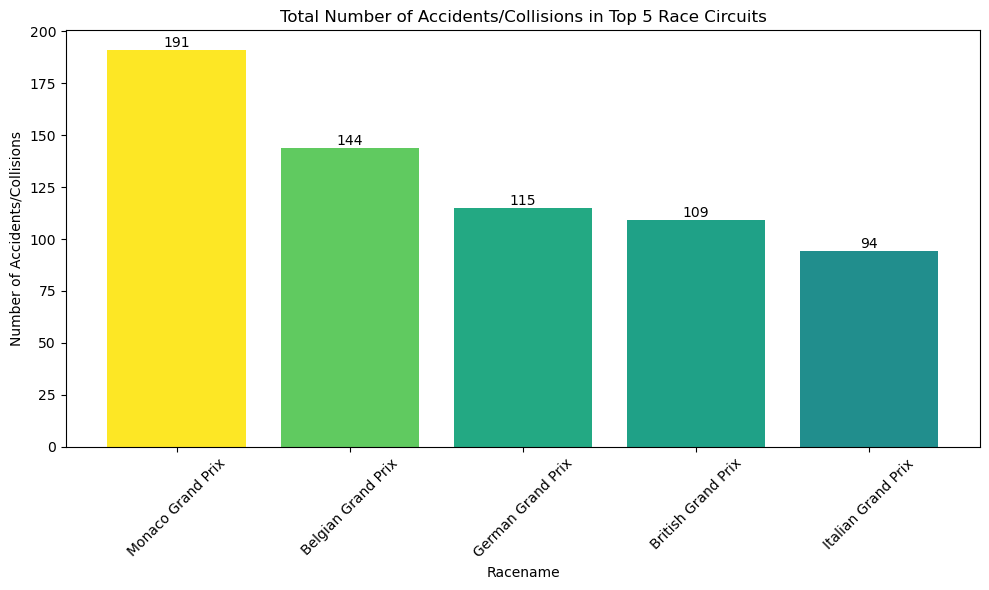

In [87]:
# Get the values for coloring
values = _numAccidents['Accidents/collisions']

# Creating a color gradient based on the values
colors = plt.cm.viridis(values / float(max(values)))  # Using viridis colormap

# Plotting the bar chart with gradient colors
plt.figure(figsize=(10, 6))
bars = plt.bar(_numAccidents['racename'], _numAccidents['Accidents/collisions'], color=colors)
plt.xlabel('Racename')
plt.ylabel('Number of Accidents/Collisions')
plt.title('Total Number of Accidents/Collisions in Top 5 Race Circuits')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding data labels to each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

# Show plot
plt.show()

In [88]:
# Total number of races by the top 5 constructors who participated in the top 5 races.
_numRaces_byConst_top5 = filtered_df.groupby('name')['raceId'].nunique().reset_index(name='# Races').sort_values(by='# Races', ascending=False).head(5)
_numRaces_byConst_top5


name  # Races
60      Ferrari      342
111     McLaren      254
164    Williams      224
160     Tyrrell      138
152  Team Lotus      132

In [89]:
# Grouping by 'Constructor name' column and summing up the values
_numAccidents_byConst_top5 = accidents_top5.groupby('name')['raceId'].nunique().reset_index(name='# Accidents/Collisions').sort_values(by='# Accidents/Collisions', ascending=False).head(5)
_numAccidents_byConst_top5

name  # Accidents/Collisions
25   Ferrari                      58
52   McLaren                      48
86  Williams                      33
68    Sauber                      29
84   Tyrrell                      22

In [90]:
# Merge the DataFrames on the 'name' column
merged_df = pd.merge(_numAccidents_byConst_top5, _numRaces_byConst_top5, on='name')

# Calculate the ratio of accidents to races for the top 5 constructors
merged_df['Accidents-to-Races Ratio'] = np.round((merged_df['# Accidents/Collisions'] / merged_df['# Races'])*100, 1)

In [91]:
merged_df

name  # Accidents/Collisions  # Races  Accidents-to-Races Ratio
0   Ferrari                      58      342                      17.0
1   McLaren                      48      254                      18.9
2  Williams                      33      224                      14.7
3   Tyrrell                      22      138                      15.9

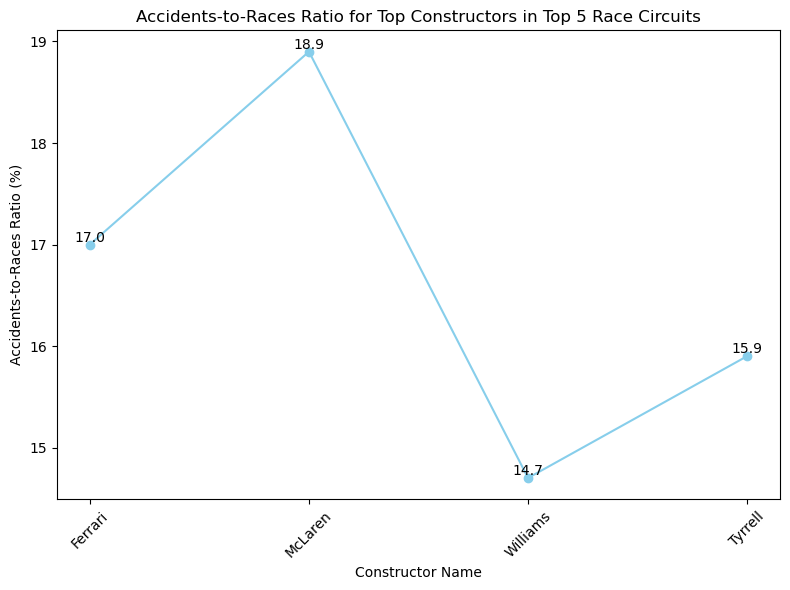

In [92]:
# Plotting the line plot
plt.figure(figsize=(8, 6))
plt.plot(merged_df['name'], merged_df['Accidents-to-Races Ratio'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Constructor Name')
plt.ylabel('Accidents-to-Races Ratio (%)')
plt.title('Accidents-to-Races Ratio for Top Constructors in Top 5 Race Circuits')
plt.xticks(rotation=45)
# plt.grid(True)
plt.tight_layout()
# Adding data labels to each data point
for i, txt in enumerate(merged_df['Accidents-to-Races Ratio']):
    plt.text(i, txt, f'{txt}', ha='center', va='bottom')

# Show plot
plt.show()

In [93]:
# Grouping by 'Status' column and summing up the values
status_summary = accidents_top5.groupby('status')['raceId'].nunique().reset_index(name='Sum')

In [94]:
status_summary

status  Sum
0   Accident  162
1  Collision  105

In [95]:
accidents_top5.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'racename', 'round', 'date',
       'driverRef', 'forename', 'surname', 'nationality_x', 'dob', 'name',
       'nationality_y', 'status'],
      dtype='object')

In [97]:
temp_df = HW[(HW['statusId'].isin([3, 4]))]

In [98]:
# # Getting a count of races from 1950 - 2023 and sorted in descending and fitered to top 5 Races 
# races_year = temp_df.groupby('year')['raceId'].nunique().reset_index(name='# Races').sort_values(by='year', ascending=True)
# # _numRaces = races.head(5)
# # races_year = races_year.sort_values(by = 'year')
# races_year

In [99]:
# Getting a count of races from 1950 - 2023 and sorted in descending and fitered to top 5 Races 
accidents_year = temp_df.groupby('year')['status'].count().reset_index(name='# Accidents').sort_values(by='year', ascending=True)
# _numRaces = races.head(5)
# races_year = races_year.sort_values(by = 'year')
accidents_year

year  # Accidents
0   1950           13
1   1951            9
2   1952            5
3   1953           13
4   1954           13
..   ...          ...
69  2019           21
70  2020           18
71  2021           26
72  2022           18
73  2023            9

[74 rows x 2 columns]

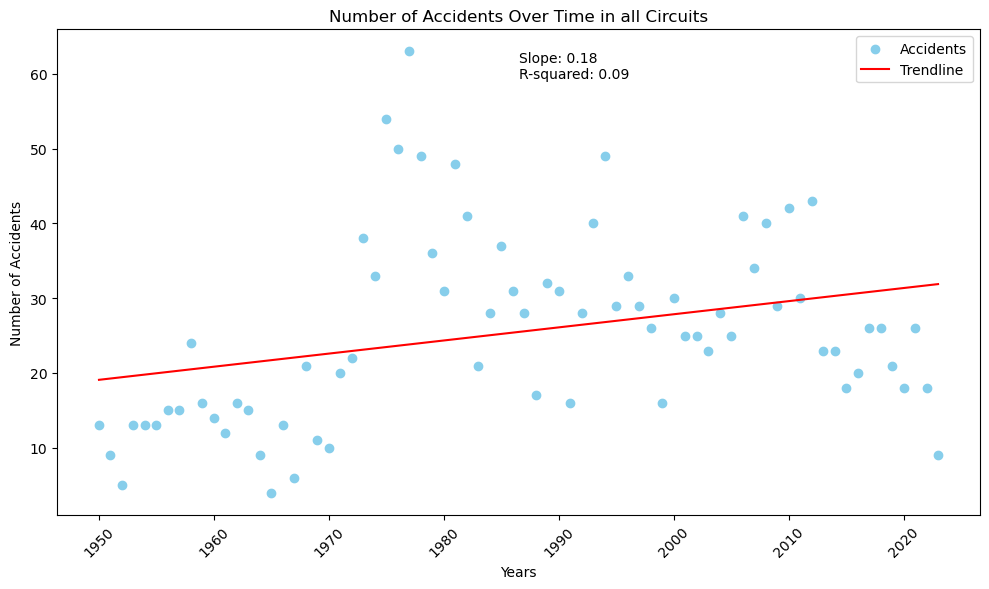

In [100]:
# Plotting the number of accidents over time with a trendline
plt.figure(figsize=(10, 6))
plt.scatter(accidents_year['year'], accidents_year['# Accidents'], color='skyblue', label='Accidents')
plt.xlabel('Years')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over Time in all Circuits')

# Calculate the trendline using polynomial regression (adjust the degree as needed)
degree = 1  # Linear regression
p = np.polyfit(accidents_year['year'], accidents_year['# Accidents'], degree)
trendline = np.polyval(p, accidents_year['year'])

# Plotting the trendline
plt.plot(accidents_year['year'], trendline, color='red', label='Trendline')

# Calculate slope and R-squared (R2) value
slope, intercept = p
r2_value = r2_score(accidents_year['# Accidents'], trendline)

# Display slope and R2 value on the plot
plt.text(0.5, 0.9, f'Slope: {slope:.2f}\nR-squared: {r2_value:.2f}', transform=plt.gca().transAxes, fontsize=10)

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [101]:
# filtering the dataframne to Top 5 Race Circuits
filtered_temp = temp_df[(temp_df['racename'].isin(racename_list))]

In [102]:
# Getting a count of races from 1950 - 2023 and sorted in descending and fitered to top 5 Races 
accidents_year_top5 = filtered_temp.groupby('year')['status'].count().reset_index(name='# Accidents').sort_values(by='year', ascending=True)
# _numRaces = races.head(5)
# races_year = races_year.sort_values(by = 'year')
# accidents_year_top5

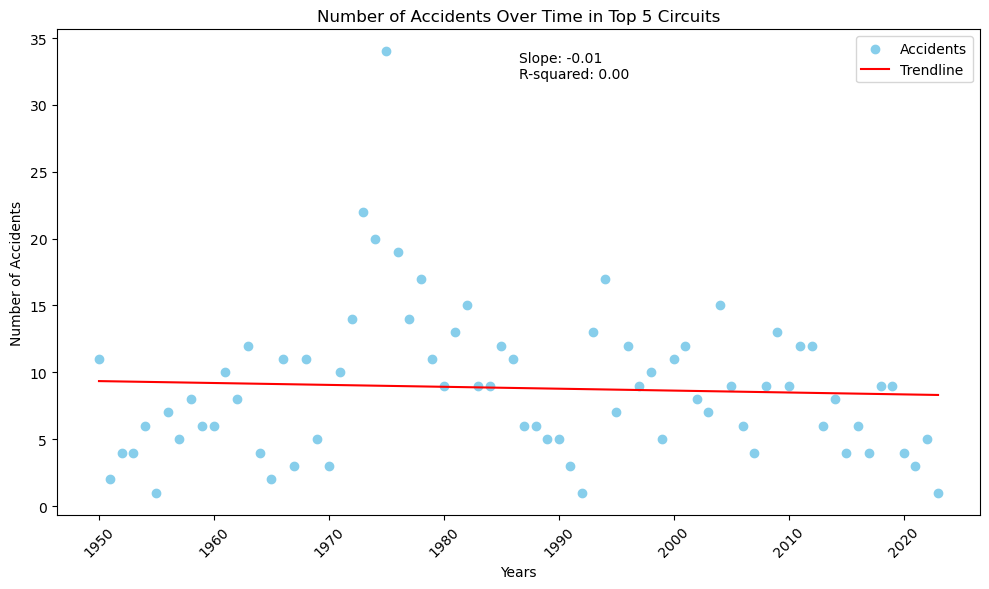

In [103]:
# Plotting the number of accidents over time with a trendline
plt.figure(figsize=(10, 6))
plt.scatter(accidents_year_top5['year'], accidents_year_top5["# Accidents"], color='skyblue', label='Accidents')
plt.xlabel('Years')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over Time in Top 5 Circuits')

# Calculate the trendline using polynomial regression (adjust the degree as needed)
degree = 1  # Linear regression
p = np.polyfit(accidents_year_top5['year'], accidents_year_top5["# Accidents"], degree)
trendline = np.polyval(p, accidents_year_top5['year'])

# Plotting the trendline
plt.plot(accidents_year_top5['year'], trendline, color='red', label='Trendline')

# Calculate slope and R-squared (R2) value
slope, intercept = p
r2_value = r2_score(accidents_year_top5["# Accidents"], trendline)

# Display slope and R2 value on the plot
plt.text(0.5, 0.9, f'Slope: {slope:.2f}\nR-squared: {r2_value:.2f}', transform=plt.gca().transAxes, fontsize=10)

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()